In [1]:
import polars as pl
from matplotlib_venn import venn3

In [2]:
train = pl.read_csv("../../data/train.csv")
anime = pl.read_csv("../../data/anime.csv")
test = pl.read_csv("../../data/test.csv")
sample_submission = pl.read_csv("../../data/sample_submission.csv")

In [3]:
train_anime_id_set = set(train.get_column("anime_id").unique())
test_anime_id_set = set(test.get_column("anime_id").unique())
anime_anime_id_set = set(anime.get_column("anime_id").unique())

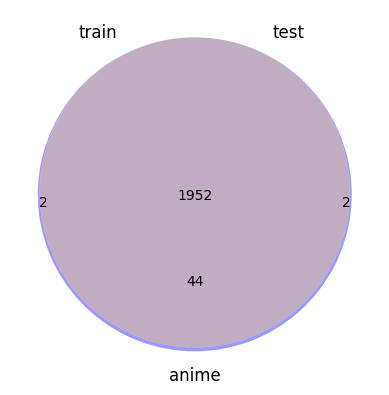

In [4]:
venn3([train_anime_id_set, test_anime_id_set, anime_anime_id_set], set_labels = ("train", "test", "anime"));

In [5]:
len(set(anime.get_column("anime_id").unique()))

2000

In [6]:
len(set(train.get_column("anime_id").unique()) & set(anime.get_column("anime_id").unique()))

1954

In [7]:
anime_score_agg_df = train.join(anime, on="anime_id", how="left").groupby("anime_id").agg(
    pl.sum("score").alias("anime_score_sum"),
    pl.count("score").alias("anime_score_count"),
    pl.mean("score").alias("anime_score_mean"),
    pl.std("score").alias("anime_score_std"),
    pl.median("score").alias("anime_score_median"),
    pl.max("score").alias("anime_score_max"),
    pl.min("score").alias("anime_score_min")
)

In [8]:
anime.join(anime_score_agg_df, on="anime_id", how="left").sort("anime_score_mean", descending=True).write_csv("anime_score_mean.csv")